## Importing computer vision libraries 
# 1. torchvison: base domain 
# 2. torchdataset: dataset
# 3. torch.model: get pretained models
# 4. torch.transforms: manupulating vision data into numbers(ML model)
# 5. torch.utils.dtaset: Case dataset

In [88]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualizaiton
import matplotlib.pyplot as plt

# Checking the versions
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


## 1. Getting a dataset
FashionMNIST dataset.

In [89]:
train_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want ot download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data =datasets.FashionMNIST(
    root = 'data',
    train = False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [90]:
len(train_data), len(test_data)

(60000, 10000)

In [91]:
# See the first training data example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [92]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [93]:
len(class_names)

10

In [94]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [95]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [96]:
# Checking the shape of the images
print(f"Image shape: {image.shape} --> [color_channel, height , width]")
print(f"Image lagel: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) --> [color_channel, height , width]
Image lagel: Ankle boot


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

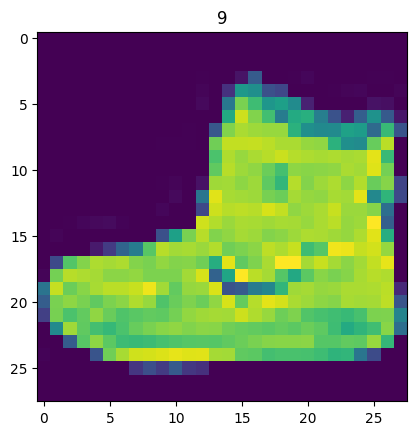

In [97]:
## Visualizing our data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

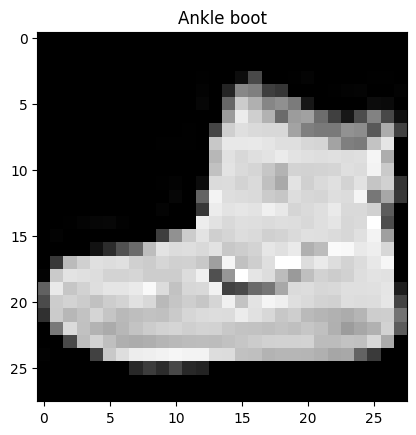

In [98]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])

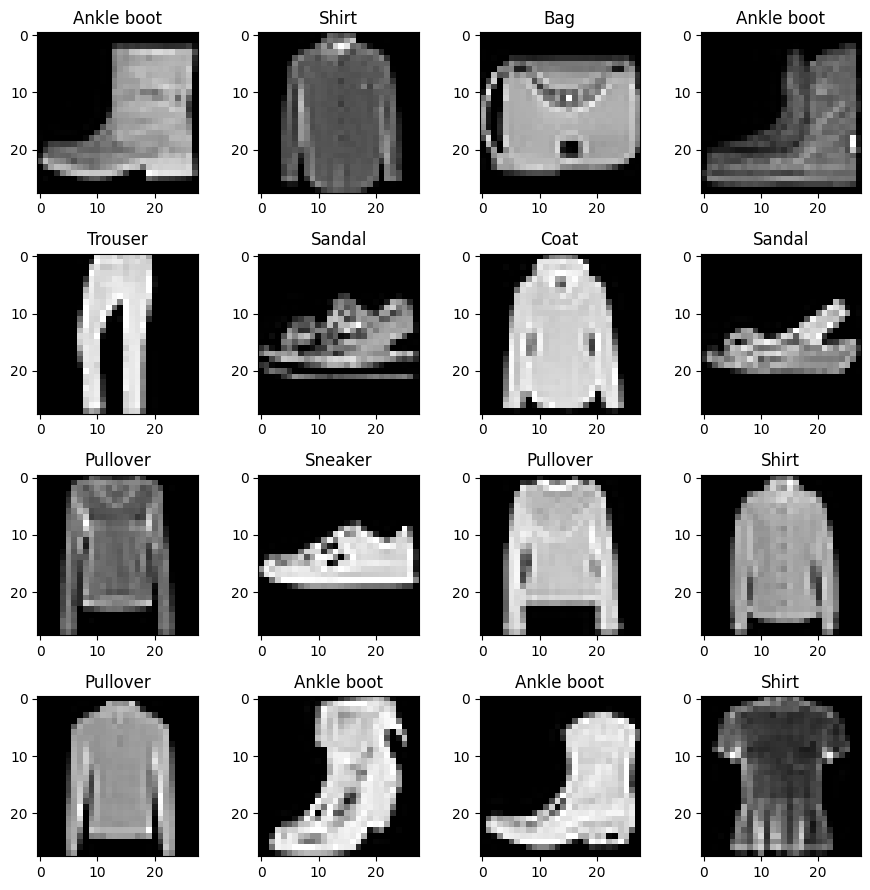

In [99]:
# plot more images random
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows * cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")
    plt.title(class_names[label])
plt.tight_layout()
plt.show()
    

# 2. to prepare of data loader 
DataLoader turns data into a Python iterable 
More specifically we want to turn our data into batches (or mini-batches)
1. More efficiency 
2. More chances up update greadient per epoch.

In [100]:
# Turn train dataset into DataLoader
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterabel 
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size= BATCH_SIZE, 
                             shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2a3b48f8170>,
 <torch.utils.data.dataloader.DataLoader at 0x2a3b4725400>)

In [101]:
# Let's checkout what we have created
print(f"Dataloader:{train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)}")
print(f"Length of test_dataloader: {len(test_dataloader)}")
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

Dataloader:(<torch.utils.data.dataloader.DataLoader object at 0x000002A3B48F8170>, <torch.utils.data.dataloader.DataLoader object at 0x000002A3B4725400>)
Length of train_dataloader: 1875
Length of test_dataloader: 313


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size :torch.Size([1, 28, 28])
Labe:6, label size:torch.Size([])


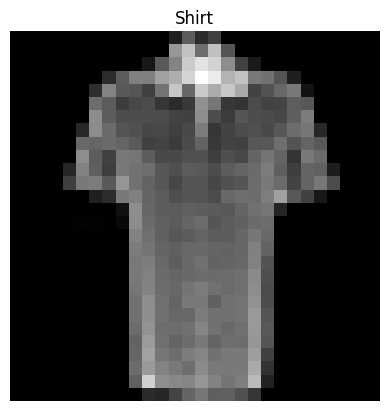

In [107]:
# show a smple 
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('off')
print(f"Image size :{img.shape}")
print(f"Labe:{label}, label size:{label.shape}")

In [113]:
# Mode 0: Build a basline model 
## Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample 
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

print(f"shape before falttening: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape before falttening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [116]:
from torch import nn

class FashionMNISTModelv0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        """
        Initializes the FashionMNISTModelv0 neural network.
        
        Args:
            input_shape (int): The number of input features (e.g., 28*28 for 28x28 images).
            hidden_units (int): The number of units in the hidden layer.
            output_shape (int): The number of output features (e.g., 10 for 10 classes).
        """
        super().__init__()  # Call the parent class (nn.Module) initializer
        
        # Create a Sequential container for the network layers
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # Flatten the input tensor (e.g., 28x28 image) to a 1D tensor
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # Fully connected hidden layer
            nn.Linear(in_features=hidden_units, out_features=output_shape)  # Fully connected output layer
        )
    
    def forward(self, x):
        """
        Defines the forward pass of the model.
        
        Args:
            x (torch.Tensor): The input tensor.
            
        Returns:
            torch.Tensor: The output tensor after passing through the network.
        """
        return self.layer_stack(x)  # Pass the input through the layer stack and return the output


In [117]:
torch.manual_seed(42)

model_0 = FashionMNISTModelv0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)

model_0.to('cpu')

model_0


FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [118]:
dummy_x = torch.rand([1, 1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)